### Create a network with EN functions eliminitating the need to an EPANET formatted input file. 
This creates the opportunity to use relational database files or GIS/CAD files. 

##### THE USER HAS TO ADD api to call THE EN FUNCTIONS e.g., d.api.ENaddnode


In [1]:
from epyt import epanet

# Initialize epanet without inputs
d = epanet()

EPANET version 20200 loaded (EPyT version 0.0.1).


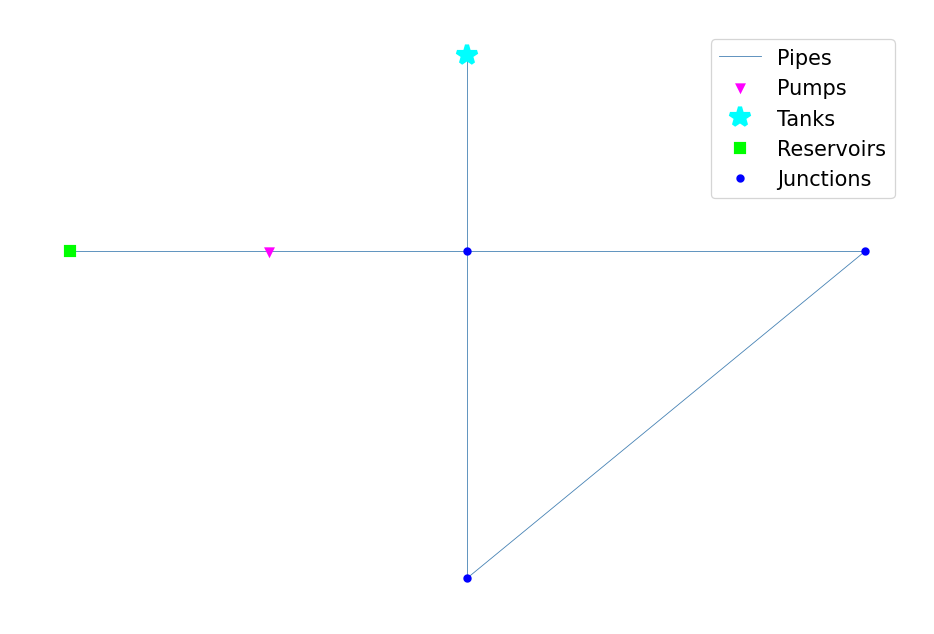

In [2]:
# Use gpm for flow units and the Hazen-Williams formula for head loss
d.api.ENinit(d.ToolkitConstants.EN_GPM, d.ToolkitConstants.EN_HW)

# Add the first junction node to the project with an 
# elevation of 700 ft and a demand of 0
index = d.api.ENaddnode('J1', d.ToolkitConstants.EN_JUNCTION)
d.api.ENsetjuncdata(index, 700, 0, '')
d.api.ENsetcoord(index, 0, 0)

# Add the remaining two junctions with elevations of
# 710 ft and demands of 250 and 500 gpm, respectively
index = d.api.ENaddnode('J2', d.ToolkitConstants.EN_JUNCTION)
d.api.ENsetjuncdata(index, 710, 250, '')
d.api.ENsetcoord(index, 0, -100)
index = d.api.ENaddnode('J3', d.ToolkitConstants.EN_JUNCTION)
d.api.ENsetjuncdata(index, 710, 500, '')
d.api.ENsetcoord(index, 100, 0)

# Add the reservoir at an elevation of 650 ft
index = d.api.ENaddnode('R1', d.ToolkitConstants.EN_RESERVOIR)
d.api.ENsetnodevalue(index, d.ToolkitConstants.EN_ELEVATION, 650)
d.api.ENsetcoord(index, -100, 0)

# Add the tank node at elevation of 850 ft, initial water level
# at 120 ft, minimum level at 100 ft, maximum level at 150 ft
# and a diameter of 50.5 ft
index = d.api.ENaddnode('T1', d.ToolkitConstants.EN_TANK)
d.api.ENsettankdata(index, 850, 120, 100, 150, 50.5, 0, '')
d.api.ENsetcoord(index, 0, 60)
# Add the pipes to the project, setting their length,
# diameter, and roughness values
index = d.api.ENaddlink('P1', d.ToolkitConstants.EN_PIPE, 'J1', 'J2')
d.api.ENsetpipedata(index, 10560, 12, 100, 0)
index = d.api.ENaddlink('P2', d.ToolkitConstants.EN_PIPE, 'J1', 'T1')
d.api.ENsetpipedata(index, 5280, 14, 100, 0)
index = d.api.ENaddlink('P3', d.ToolkitConstants.EN_PIPE, 'J1', 'J3')
d.api.ENsetpipedata(index, 5280, 14, 100, 0)
index = d.api.ENaddlink('P4', d.ToolkitConstants.EN_PIPE, 'J2', 'J3')
d.api.ENsetpipedata(index, 5280, 14, 100, 0)

# Add a pump to the project
index = d.api.ENaddlink('PUMP', d.ToolkitConstants.EN_PUMP, 'R1', 'J1')
# Create a single point head curve (index = 1) and assign it to the pump
errcode = d.api.ENaddcurve('C1')
d.api.ENsetcurvevalue(1, 1, 1500, 250)
d.api.ENsetlinkvalue(index, d.ToolkitConstants.EN_PUMP_HCURVE, 1)

# Save the project for future use
d.api.ENsaveinpfile('example2.inp')

d.plot()

d.api.ENclose()